# OpenSAFELY COVID Vaccine coverage report: Booster / third doses 

OpenSAFELY is a new secure analytics platform for electronic patient records built on behalf of NHS England to deliver urgent academic and operational research during the pandemic. 

This is an extension of our [regular weekly report](https://reports.opensafely.org/reports/vaccine-coverage/) on COVID-19 vaccination coverage in England using data from 40% of general practices that use TPP electronic health record software. **The data requires careful interpretation and there are a number of caveats. Please read the full detail about our methods and discussion of our earlier results (as of 17 March 2021) in our [peer-reviewed publication in the British Journal of General Practice](https://doi.org/10.3399/BJGP.2021.0376).** 

The full analytical methods behind the latest results in this report are available [here](https://github.com/opensafely/nhs-covid-vaccination-uptake).

**Update: Our vaccine reports are currently published monthly.  If you rely on more regular data updates for your own reporting or analysis please contact team@opensafely.org to let us know.**

## Booster/Third doses

In [1]:
from datetime import datetime
%matplotlib inline
%config InlineBackend.figure_format='png'

from IPython.display import display, Markdown
import os
import pandas as pd
pd.set_option("display.max_rows", 200)
import sys
sys.path.append('../lib/')
from create_report import find_and_sort_filenames
from second_third_doses import *

backend = os.getenv("OPENSAFELY_BACKEND", "expectations")
suffix = "_tpp"

display(Markdown(f"### Report last updated **{datetime.today().strftime('%d %b %Y')}**"))

with open(os.path.join("..", "interim-outputs","text", "latest_date.txt"), 'r') as file:
    latest_date_fmt = file.read()
    display(Markdown(f"### Third dose vaccinations included up to **{latest_date_fmt}** inclusive"))
    
with open(os.path.join("..", "interim-outputs","text", "latest_date_of_second_dose_for_due_third_doses.txt"), 'r') as file:
    latest_date_3rdDUE_fmt = file.read()

with open(os.path.join("..", "interim-outputs","text", "latest_date_of_second_dose_for_due_third_doses_specified_delay.txt"), 'r') as file:
    latest_date_3rdDUE_delay = file.read()

latest_date_3rdDUE_delay_abbreviated = abbreviate_time_period(latest_date_3rdDUE_delay)

additional_stats = pd.read_csv(os.path.join("..", "interim-outputs", "text", "additional_stats_third_dose.txt")).set_index("Unnamed: 0")


### Report last updated **31 Jan 2022**

### Third dose vaccinations included up to **17 Jan 2022** inclusive

In [2]:
display(Markdown(f"This report is intended to highlight any differences between subgroups of priority cohorts in receiving 'booster' doses (or third primary doses where eligible), at least {latest_date_3rdDUE_delay} after their second dose."))

display(Markdown(
    f"### Only persons who had their second dose at least {latest_date_3rdDUE_delay} ago (**{latest_date_3rdDUE_fmt}**) are included in the 'due' group."))

display(Markdown(f"##### \n"
                 f"### Vaccine types\n"
                 f"**Note:** numbers may not sum to 100% as it is not always possible to determine vaccine type given, and patients occasionally have more than one brand recorded on the same day."))

for x in additional_stats.index[0:3]:
    display(Markdown(f"{x}: {additional_stats.loc[x][0]}\n"))


This report is intended to highlight any differences between subgroups of priority cohorts in receiving 'booster' doses (or third primary doses where eligible), at least 14 weeks after their second dose.

### Only persons who had their second dose at least 14 weeks ago (**11 Oct 2021**) are included in the 'due' group.

##### 
### Vaccine types
**Note:** numbers may not sum to 100% as it is not always possible to determine vaccine type given, and patients occasionally have more than one brand recorded on the same day.

Oxford-AZ vaccines (% of all third doses): **9.7%** (973)


Pfizer vaccines (% of all third doses): **22.6%** (2,261)


Moderna vaccines (% of all third doses): **17.1%** (1,708)


## Contents

**Cumulative third dose vaccination figures among:**
- [**80+** population](#Cumulative-third-dose-vaccination-figures-among-80+-population)
- [**70-79** population](#Cumulative-third-dose-vaccination-figures-among-70-79-population)
- [**Care home** population](#Cumulative-third-dose-vaccination-figures-among-care-home-population)
- <a href="#Cumulative-third-dose-vaccination-figures-among-shielding-(aged-16-69)-population"><strong>Shielding (aged 16-69)</strong> population</a>
- [**65-69** population](#Cumulative-third-dose-vaccination-figures-among-65-69-population)
- <a href="#Cumulative-third-dose-vaccination-figures-among-Learning-Disabilities-(aged-16-64)-population"><strong>LD (aged 16-64)</strong> population</a>
- [**60-64** population](#Cumulative-third-dose-vaccination-figures-among-60-64-population)
- [**55-59** population](#Cumulative-third-dose-vaccination-figures-among-55-59-population)
- [**50-54** population](#Cumulative-third-dose-vaccination-figures-among-50-54-population)
- [**40-49** population](#Cumulative-third-dose-vaccination-figures-among-40-49-population)
- [**30-39** population](#Cumulative-third-dose-vaccination-figures-among-30-39-population)
- [**18-29** population](#Cumulative-third-dose-vaccination-figures-among-18-29-population)
- [**All groups (Summary)**](#Summary)


In [3]:
with open('../lib/group_definitions.txt') as f:
    group_defs = f.read()
    display(Markdown(group_defs))

### Group definitions
- As of 29 Nov 2021, patient age is calculated at 31 Aug 2021 (previously 31 March 2021), in line with [national reporting](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1036047/Vaccine_surveillance_report_-_week_47.pdf). 
- The **care home** group is defined based on patients (aged 65+) having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/longres/v1/).
- The **shielding** group is defined based on patients (aged 16-69) having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/shield/v1/) provided it was not superceded by one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/nonshield/v1/).            
- The **LD** (learning disability) group is defined based on patients (aged 16-64) having one of [these](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/learndis/v1/) codes and excludes people who are shielding.
- Patients are counted in their highest risk category only; e.g. a 65-year-old who is shielding is only counted in the shielding group, not in the 65-69 group.
- The **housebound** group is defined based on [this](https://codelists.opensafely.org/codelist/opensafely/housebound/5bc77310/)
codelist and excludes people who were later recorded as [not housebound](https://codelists.opensafely.org/codelist/opensafely/no-longer-housebound/29a88ca6/) or in a [care home](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/longres/v1/).


/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative third dose vaccination figures among 80+ population 
 Please refer to footnotes below table for information.

Third Doses due at 17 Jan 2022 (n)  \
Category                                  Group                                                                    
overall                                   overall                                                          2,415   
Sex                                       F                                                                1,253   
                                          M                                                                1,162   
Age band                                  0-15                                                               154   
                                          16-17                                                              133   
                                          18-29                                                              182   
                                          30-34                                                              154   
                                          35-39                                                              140   
                                          40-44                                                              161   
                                          45-49                                                              140   
                                          50-54                                                              154   
                                          55-59                                                              182   
                                          60-64                                                              147   
                                          65-69                                                              140   
                                          70-74                                                              161   
                                          75-79                                                              161   
                                          80-84                                                              189   
                                          85-89                                                              154   
Ethnicity (broad categories)              Black                                                              434   
                                          Mixed                                                              420   
                                          Other                                                              413   
                                          South Asian                                                        371   
                                          Unknown                                                            385   
                                          White                                                              392   
ethnicity 16 groups                        African                                                           119   
                                           Bangladeshi or British Bangladeshi                                119   
                                           Caribbean                                                         119   
                                           Chinese                                                           147   
                                           Other                                                             126   
                                           Other Asian                                                       147   
                                          British or Mixed British                                           126   
                                          Indian or British Indian                                           140   
                                          Irish                                                              140   
                  

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

- Chronic kidney disease is defined as the presence of a relevant diagnostic code, or a most recent stage recorded >= 3.

## 
 ## Third Doses Overdue Among 80+ Population

Third doses which have not been given at least 14 weeks since the second dose

Error bars indicate possible error caused by rounding

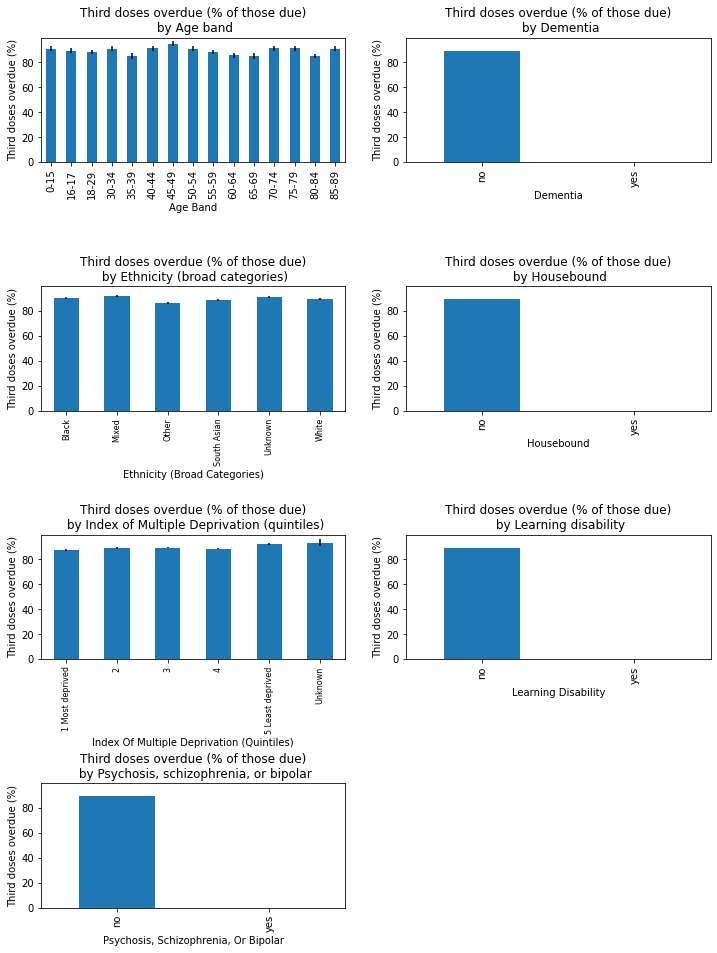

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative third dose vaccination figures among 70-79 population 
 Please refer to footnotes below table for information.

Third Doses due at 17 Jan 2022 (n)  \
Category                                  Group                                                                    
overall                                   overall                                                          4,242   
Sex                                       F                                                                2,149   
                                          M                                                                2,093   
Age band                                  0                                                                   42   
                                          0-15                                                               280   
                                          16-17                                                              273   
                                          18-29                                                              287   
                                          30-34                                                              266   
                                          35-39                                                              287   
                                          40-44                                                              301   
                                          45-49                                                              266   
                                          50-54                                                              273   
                                          55-59                                                              231   
                                          60-64                                                              280   
                                          65-69                                                              280   
                                          70-74                                                              280   
                                          75-79                                                              280   
                                          80-84                                                              280   
                                          85-89                                                              294   
                                          90+                                                                 49   
Ethnicity (broad categories)              Black                                                              714   
                                          Mixed                                                              728   
                                          Other                                                              721   
                                          South Asian                                                        756   
                                          Unknown                                                            637   
                                          White                                                              693   
ethnicity 16 groups                        African                                                           203   
                                           Bangladeshi or British Bangladeshi                                224   
                                           Caribbean                                                         238   
                                           Chinese                                                           238   
                                           Other                                                             217   
                                           Other Asian                                                       217   
                                          British or Mixed British                                           245   
                  

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

- Chronic kidney disease is defined as the presence of a relevant diagnostic code, or a most recent stage recorded >= 3.

## 
 ## Third Doses Overdue Among 70-79 Population

Third doses which have not been given at least 14 weeks since the second dose

Error bars indicate possible error caused by rounding

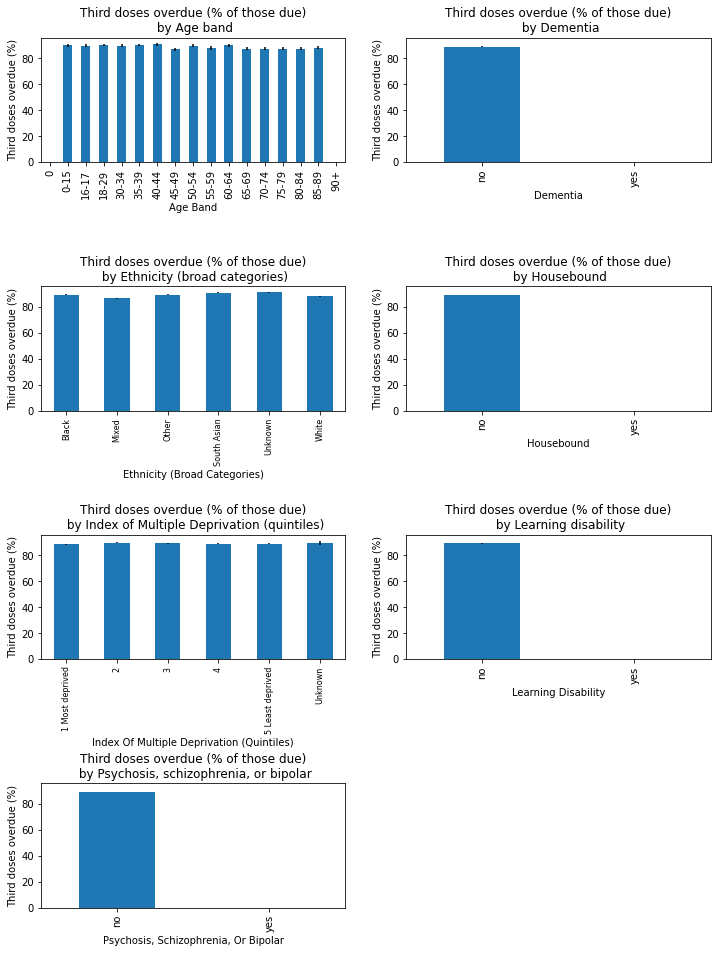

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative third dose vaccination figures among care home population 
 Please refer to footnotes below table for information.

Third Doses due at 17 Jan 2022 (n)  \
Category                     Group                                            
overall                      overall                                  1,645   
Sex                          F                                          819   
                             M                                          826   
Age band                     0                                           21   
                             0-15                                       112   
                             16-17                                      105   
                             18-29                                      126   
                             30-34                                       98   
                             35-39                                      119   
                             40-44                                       98   
                             45-49                                      112   
                             50-54                                      112   
                             55-59                                       98   
                             60-64                                       84   
                             65-69                                       98   
                             70-74                                      112   
                             75-79                                      112   
                             80-84                                      105   
                             85-89                                      105   
                             90+                                         21   
Ethnicity (broad categories) Black                                      266   
                             Mixed                                      280   
                             Other                                      287   
                             South Asian                                287   
                             Unknown                                    252   
                             White                                      273   
Dementia                     no                                       1,631   

                                         Third doses overdue (n)  \
Category                     Group                                 
overall                      overall                       1,491   
Sex                          F                               742   
                             M                               749   
Age band                     0                                21   
                             0-15                             98   
                             16-17                            91   
                             18-29                           119   
                             30-34                            98   
                             35-39                           112   
                             40-44                            84   
                             45-49                            98   
                             50-54                            98   
                             55-59                            84   
                             60-64                            84   
                             65-69                            84   
                             70-74                           105   
                             75-79                           105   
                             80-84                            98   
                             85-89                            98   
                             90+                              21   
Ethnicity (broad categories) Black                           238   
                             Mixed                           259   
                             Other                           266   
                             South Asian         

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Population includes those known to live in an elderly care home, based upon clinical coding.

## 
 ## Third Doses Overdue Among Care Home Population

Third doses which have not been given at least 14 weeks since the second dose

Error bars indicate possible error caused by rounding

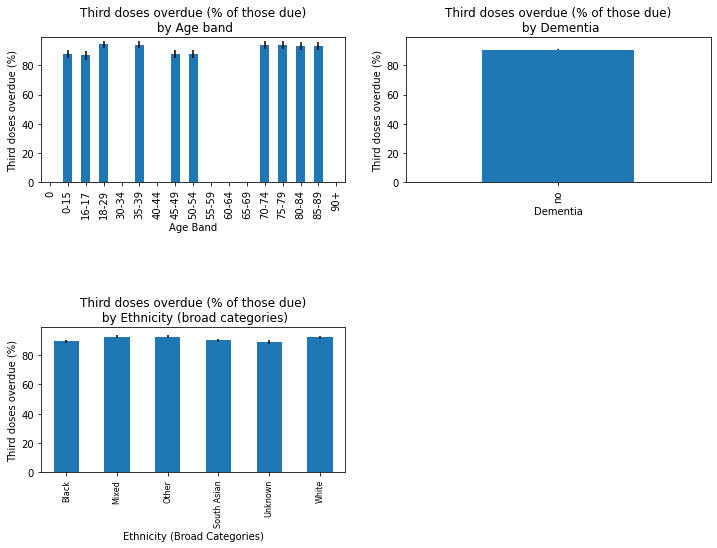

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative third dose vaccination figures among shielding (aged 16-69) population 
 Please refer to footnotes below table for information.

Third Doses due at 17 Jan 2022 (n)  \
Category                                  Group                                                 
overall                                   overall                                         490   
newly shielded since feb 15               no                                              490   
Sex                                       F                                               245   
                                          M                                               245   
Age band                                  16-29                                            70   
                                          30-39                                            56   
                                          40-49                                            70   
                                          50-59                                            56   
                                          60-69                                            63   
                                          70-79                                           126   
                                          80+                                              56   
Ethnicity (broad categories)              Black                                            91   
                                          Mixed                                            77   
                                          Other                                            91   
                                          South Asian                                      84   
                                          Unknown                                          63   
                                          White                                            84   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                  91   
                                          2                                                91   
                                          3                                                84   
                                          4                                                91   
                                          5 Least deprived                                112   
                                          Unknown                                          21   
Learning disability                       no                                              483   
Chronic kidney disease                    no                                              399   
                                          yes                                              98   

                                                           Third doses overdue (n)  \
Category                                  Group                                      
overall                                   overall                              441   
newly shielded since feb 15               no                                   441   
Sex                                       F                                    224   
                                          M                                    224   
Age band                                  16-29                                 63   
                                          30-39                                 56   
                                          40-49                                 63   
                                          50-59                                 56   
                                          60-69                                 63   
                                          70-79                                112   
                                          80+                                   56   
Ethnicity (broad categories)              Black                                 91   
                                          Mixed                                 70   
                                          Other     

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Population excludes those over 65 known to live in an elderly care home, based upon clinical coding.

- Chronic kidney disease is defined as the presence of a relevant diagnostic code, or a most recent stage recorded >= 3.

## 
 ## Third Doses Overdue Among Shielding (Aged 16-69) Population

Third doses which have not been given at least 14 weeks since the second dose

Error bars indicate possible error caused by rounding

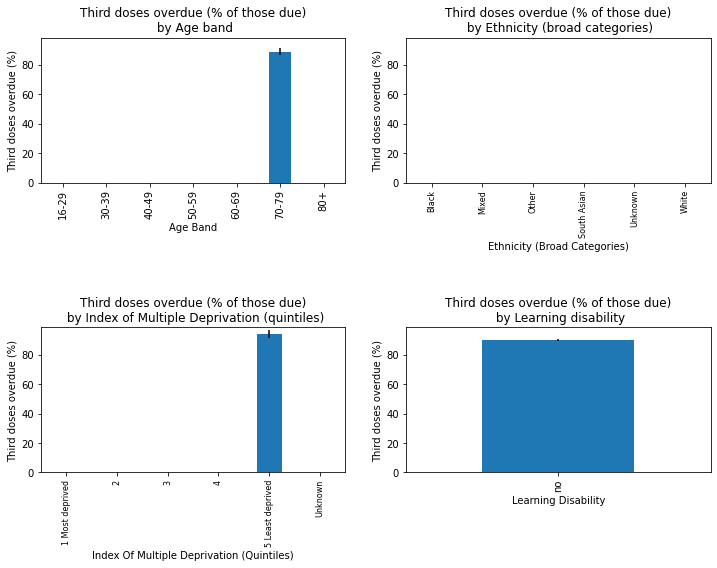

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative third dose vaccination figures among 65-69 population 
 Please refer to footnotes below table for information.

Third Doses due at 17 Jan 2022 (n)  \
Category                                  Group                                                                    
overall                                   overall                                                          2,555   
Sex                                       F                                                                1,323   
                                          M                                                                1,239   
Ethnicity (broad categories)              Black                                                              462   
                                          Mixed                                                              455   
                                          Other                                                              420   
                                          South Asian                                                        420   
                                          Unknown                                                            364   
                                          White                                                              441   
ethnicity 16 groups                        African                                                           133   
                                           Bangladeshi or British Bangladeshi                                147   
                                           Caribbean                                                         126   
                                           Chinese                                                           126   
                                           Other                                                             133   
                                           Other Asian                                                       126   
                                          British or Mixed British                                           126   
                                          Indian or British Indian                                           147   
                                          Irish                                                              147   
                                          Other Black                                                        112   
                                          Other White                                                        140   
                                          Other mixed                                                        133   
                                          Pakistani or British Pakistani                                     147   
                                          Unknown                                                            406   
                                          White + Asian                                                      119   
                                          White + Black African                                              140   
                                          White + Black Caribbean                                            140   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                                    490   
                                          2                                                                  490   
                                          3                                                                  497   
                                          4                                                                  483   
                                          5 Least deprived                                                   448   
                                          Unknown                                                            154   
BMI                                       30+                                                                763   
                  

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

- Chronic kidney disease is defined as the presence of a relevant diagnostic code, or a most recent stage recorded >= 3.

## 
 ## Third Doses Overdue Among 65-69 Population

Third doses which have not been given at least 14 weeks since the second dose

Error bars indicate possible error caused by rounding

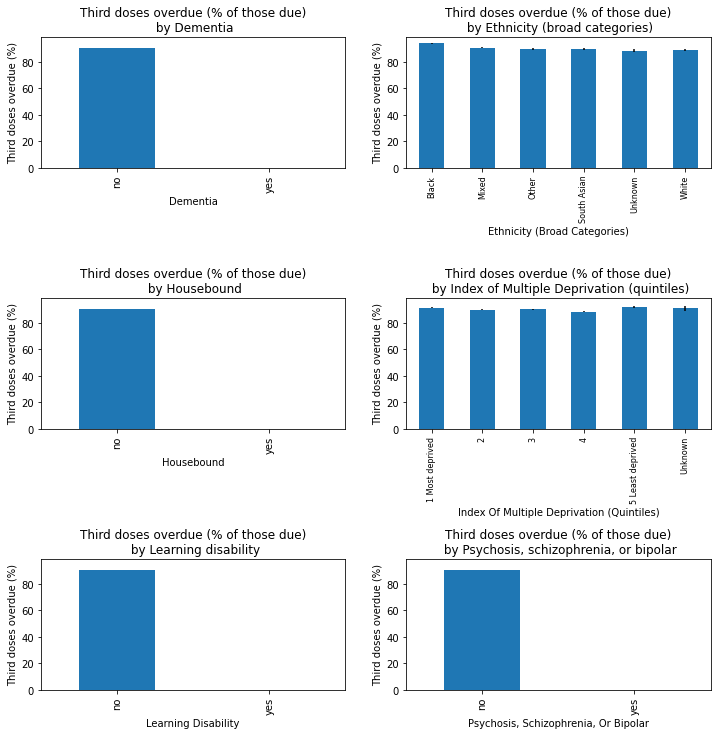

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative third dose vaccination figures among Learning Disabilities (aged 16-64) population 
 Please refer to footnotes below table for information.

Third Doses due at 17 Jan 2022 (n)  \
Category                     Group                                            
overall                      overall                                    945   
Sex                          F                                          462   
                             M                                          483   
Age band                     0                                            0   
                             0-15                                        63   
                             16-17                                       56   
                             18-29                                       63   
                             30-34                                       56   
                             35-39                                       77   
                             40-44                                       63   
                             45-49                                       56   
                             50-54                                       77   
                             55-59                                       56   
                             60-64                                       70   
                             65-69                                       56   
                             70-74                                       56   
                             75-79                                       56   
                             80-84                                       63   
                             85-89                                       42   
                             90+                                         21   
Ethnicity (broad categories) Black                                      182   
                             Mixed                                      154   
                             Other                                      168   
                             South Asian                                161   
                             Unknown                                    133   
                             White                                      154   

                                         Third doses overdue (n)  \
Category                     Group                                 
overall                      overall                         840   
Sex                          F                               406   
                             M                               434   
Age band                     0                                 0   
                             0-15                             56   
                             16-17                            49   
                             18-29                            63   
                             30-34                            49   
                             35-39                            70   
                             40-44                            56   
                             45-49                            49   
                             50-54                            63   
                             55-59                            56   
                             60-64                            63   
                             65-69                            56   
                             70-74                            49   
                             75-79                            56   
                             80-84                            63   
                             85-89                            42   
                             90+                              21   
Ethnicity (broad categories) Black                           161   
                             Mixed                           140   
                             Other                           140   
                             South Asian                     147   
                             Unknown                        

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Population excludes those who are shielding.

## 
 ## Third Doses Overdue Among People With Learning Disabilities (Aged 16-64)

Third doses which have not been given at least 14 weeks since the second dose

Error bars indicate possible error caused by rounding

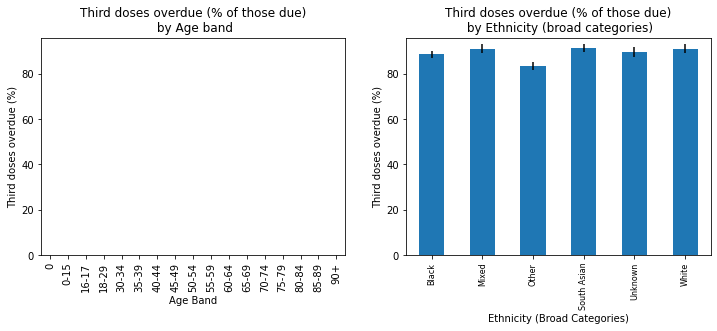

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative third dose vaccination figures among 60-64 population 
 Please refer to footnotes below table for information.

Third Doses due at 17 Jan 2022 (n)  \
Category                                  Group                                                                    
overall                                   overall                                                          3,115   
Sex                                       F                                                                1,652   
                                          M                                                                1,463   
Ethnicity (broad categories)              Black                                                              504   
                                          Mixed                                                              553   
                                          Other                                                              497   
                                          South Asian                                                        546   
                                          Unknown                                                            476   
                                          White                                                              539   
ethnicity 16 groups                        African                                                           161   
                                           Bangladeshi or British Bangladeshi                                140   
                                           Caribbean                                                         175   
                                           Chinese                                                           182   
                                           Other                                                             182   
                                           Other Asian                                                       189   
                                          British or Mixed British                                           154   
                                          Indian or British Indian                                           154   
                                          Irish                                                              189   
                                          Other Black                                                        182   
                                          Other White                                                        154   
                                          Other mixed                                                        154   
                                          Pakistani or British Pakistani                                     147   
                                          Unknown                                                            490   
                                          White + Asian                                                      154   
                                          White + Black African                                              147   
                                          White + Black Caribbean                                            154   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                                    574   
                                          2                                                                  623   
                                          3                                                                  546   
                                          4                                                                  623   
                                          5 Least deprived                                                   595   
                                          Unknown                                                            161   
BMI                                       30+                                                                931   
                  

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

- Chronic kidney disease is defined as the presence of a relevant diagnostic code, or a most recent stage recorded >= 3.

## 
 ## Third Doses Overdue Among 60-64 Population

Third doses which have not been given at least 14 weeks since the second dose

Error bars indicate possible error caused by rounding

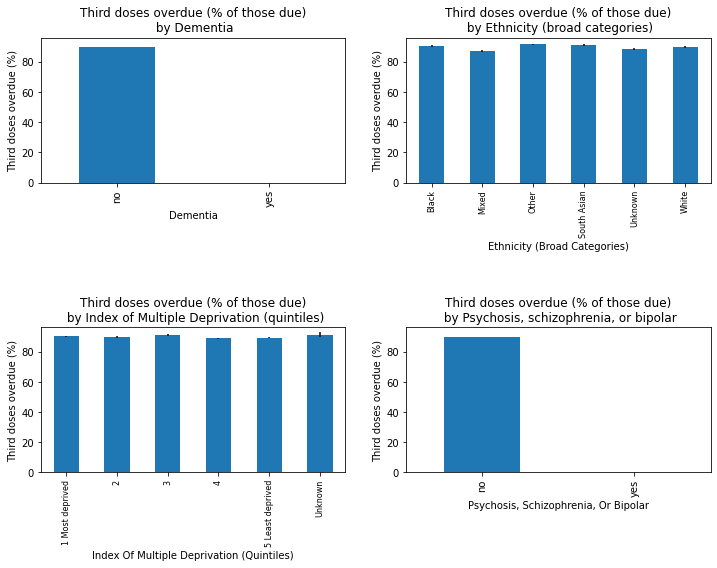

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative third dose vaccination figures among 55-59 population 
 Please refer to footnotes below table for information.

Third Doses due at 17 Jan 2022 (n)  \
Category                                  Group                                                                    
overall                                   overall                                                          3,745   
Sex                                       F                                                                1,911   
                                          M                                                                1,834   
Ethnicity (broad categories)              Black                                                              672   
                                          Mixed                                                              623   
                                          Other                                                              630   
                                          South Asian                                                        637   
                                          Unknown                                                            581   
                                          White                                                              602   
ethnicity 16 groups                        African                                                           203   
                                           Bangladeshi or British Bangladeshi                                210   
                                           Caribbean                                                         189   
                                           Chinese                                                           210   
                                           Other                                                             196   
                                           Other Asian                                                       203   
                                          British or Mixed British                                           203   
                                          Indian or British Indian                                           196   
                                          Irish                                                              203   
                                          Other Black                                                        175   
                                          Other White                                                        196   
                                          Other mixed                                                        196   
                                          Pakistani or British Pakistani                                     196   
                                          Unknown                                                            567   
                                          White + Asian                                                      224   
                                          White + Black African                                              182   
                                          White + Black Caribbean                                            196   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                                    707   
                                          2                                                                  693   
                                          3                                                                  763   
                                          4                                                                  644   
                                          5 Least deprived                                                   756   
                                          Unknown                                                            189   
BMI                                       30+                                                              1,106   
                  

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

- Chronic kidney disease is defined as the presence of a relevant diagnostic code, or a most recent stage recorded >= 3.

## 
 ## Third Doses Overdue Among 55-59 Population

Third doses which have not been given at least 14 weeks since the second dose

Error bars indicate possible error caused by rounding

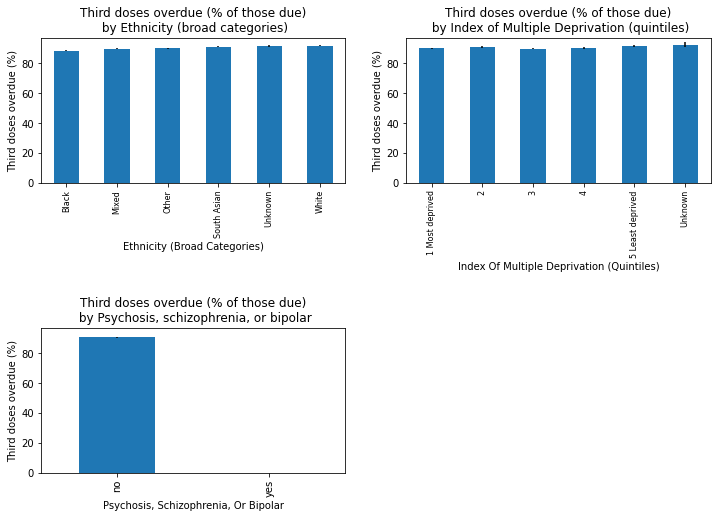

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative third dose vaccination figures among 50-54 population 
 Please refer to footnotes below table for information.

Third Doses due at 17 Jan 2022 (n)  \
Category                                  Group                                                                    
overall                                   overall                                                          4,046   
Sex                                       F                                                                2,128   
                                          M                                                                1,918   
Ethnicity (broad categories)              Black                                                              644   
                                          Mixed                                                              714   
                                          Other                                                              679   
                                          South Asian                                                        714   
                                          Unknown                                                            637   
                                          White                                                              651   
ethnicity 16 groups                        African                                                           224   
                                           Bangladeshi or British Bangladeshi                                196   
                                           Caribbean                                                         189   
                                           Chinese                                                           210   
                                           Other                                                             217   
                                           Other Asian                                                       196   
                                          British or Mixed British                                           217   
                                          Indian or British Indian                                           217   
                                          Irish                                                              196   
                                          Other Black                                                        245   
                                          Other White                                                        210   
                                          Other mixed                                                        231   
                                          Pakistani or British Pakistani                                     238   
                                          Unknown                                                            616   
                                          White + Asian                                                      203   
                                          White + Black African                                              238   
                                          White + Black Caribbean                                            203   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                                    756   
                                          2                                                                  770   
                                          3                                                                  784   
                                          4                                                                  735   
                                          5 Least deprived                                                   791   
                                          Unknown                                                            203   
BMI                                       30+                                                              1,239   
                  

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

- Chronic kidney disease is defined as the presence of a relevant diagnostic code, or a most recent stage recorded >= 3.

## 
 ## Third Doses Overdue Among 50-54 Population

Third doses which have not been given at least 14 weeks since the second dose

Error bars indicate possible error caused by rounding

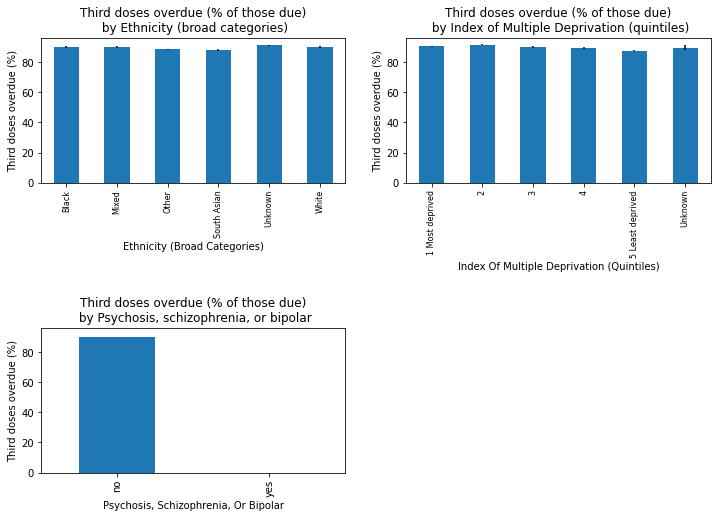

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative third dose vaccination figures among 40-49 population 
 Please refer to footnotes below table for information.

Third Doses due at 17 Jan 2022 (n)  \
Category                                  Group                                                                    
overall                                   overall                                                          7,525   
Sex                                       F                                                                3,815   
                                          M                                                                3,703   
Ethnicity (broad categories)              Black                                                            1,288   
                                          Mixed                                                            1,232   
                                          Other                                                            1,274   
                                          South Asian                                                      1,267   
                                          Unknown                                                          1,127   
                                          White                                                            1,337   
ethnicity 16 groups                        African                                                           371   
                                           Bangladeshi or British Bangladeshi                                378   
                                           Caribbean                                                         392   
                                           Chinese                                                           413   
                                           Other                                                             385   
                                           Other Asian                                                       406   
                                          British or Mixed British                                           392   
                                          Indian or British Indian                                           441   
                                          Irish                                                              413   
                                          Other Black                                                        392   
                                          Other White                                                        364   
                                          Other mixed                                                        413   
                                          Pakistani or British Pakistani                                     392   
                                          Unknown                                                          1,148   
                                          White + Asian                                                      427   
                                          White + Black African                                              413   
                                          White + Black Caribbean                                            392   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                                  1,463   
                                          2                                                                1,456   
                                          3                                                                1,407   
                                          4                                                                1,456   
                                          5 Least deprived                                                 1,372   
                                          Unknown                                                            371   
BMI                                       30+                                                              2,282   
                  

**Footnotes:**


- Patient counts rounded to the nearest 7.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

- Chronic kidney disease is defined as the presence of a relevant diagnostic code, or a most recent stage recorded >= 3.

## 
 ## Third Doses Overdue Among 40-49 Population

Third doses which have not been given at least 14 weeks since the second dose

Error bars indicate possible error caused by rounding

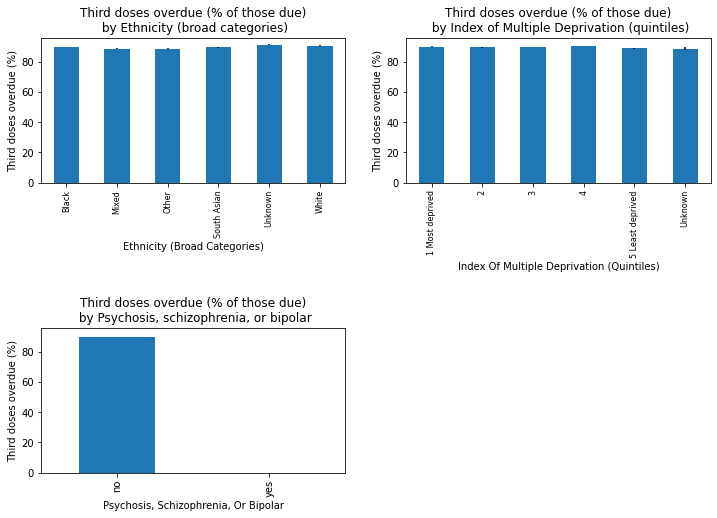

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative third dose vaccination figures among 30-39 population 
 Please refer to footnotes below table for information.

Third Doses due at 17 Jan 2022 (n)  \
Category                                  Group                                                                    
overall                                   overall                                                          7,812   
Sex                                       F                                                                4,004   
                                          M                                                                3,815   
Ethnicity (broad categories)              Black                                                            1,337   
                                          Mixed                                                            1,295   
                                          Other                                                            1,288   
                                          South Asian                                                      1,393   
                                          Unknown                                                          1,162   
                                          White                                                            1,344   
ethnicity 16 groups                        African                                                           378   
                                           Bangladeshi or British Bangladeshi                                448   
                                           Caribbean                                                         413   
                                           Chinese                                                           413   
                                           Other                                                             427   
                                           Other Asian                                                       427   
                                          British or Mixed British                                           413   
                                          Indian or British Indian                                           399   
                                          Irish                                                              420   
                                          Other Black                                                        427   
                                          Other White                                                        420   
                                          Other mixed                                                        406   
                                          Pakistani or British Pakistani                                     399   
                                          Unknown                                                          1,169   
                                          White + Asian                                                      441   
                                          White + Black African                                              399   
                                          White + Black Caribbean                                            413   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                                  1,526   
                                          2                                                                1,519   
                                          3                                                                1,435   
                                          4                                                                1,491   
                                          5 Least deprived                                                 1,484   
                                          Unknown                                                            357   

                                                                              Third doses overdue (n)  \
Category                    

**Footnotes:**


- Patient counts rounded to the nearest 7.

## 
 ## Third Doses Overdue Among 30-39 Population

Third doses which have not been given at least 14 weeks since the second dose

Error bars indicate possible error caused by rounding

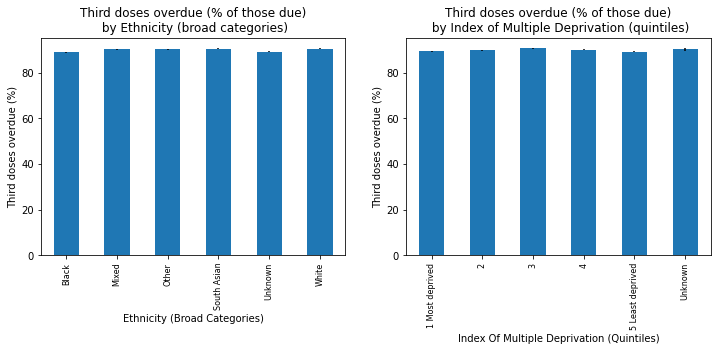

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative third dose vaccination figures among 18-29 population 
 Please refer to footnotes below table for information.

Third Doses due at 17 Jan 2022 (n)  \
Category                                  Group                                                                    
overall                                   overall                                                          8,869   
Sex                                       F                                                                4,543   
                                          M                                                                4,326   
Ethnicity (broad categories)              Black                                                            1,449   
                                          Mixed                                                            1,547   
                                          Other                                                            1,512   
                                          South Asian                                                      1,519   
                                          Unknown                                                          1,337   
                                          White                                                            1,505   
ethnicity 16 groups                        African                                                           483   
                                           Bangladeshi or British Bangladeshi                                462   
                                           Caribbean                                                         455   
                                           Chinese                                                           483   
                                           Other                                                             490   
                                           Other Asian                                                       441   
                                          British or Mixed British                                           441   
                                          Indian or British Indian                                           504   
                                          Irish                                                              490   
                                          Other Black                                                        490   
                                          Other White                                                        476   
                                          Other mixed                                                        462   
                                          Pakistani or British Pakistani                                     476   
                                          Unknown                                                          1,260   
                                          White + Asian                                                      462   
                                          White + Black African                                              518   
                                          White + Black Caribbean                                            462   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                                  1,659   
                                          2                                                                1,680   
                                          3                                                                1,673   
                                          4                                                                1,750   
                                          5 Least deprived                                                 1,687   
                                          Unknown                                                            427   

                                                                              Third doses overdue (n)  \
Category                    

**Footnotes:**


- Patient counts rounded to the nearest 7.

## 
 ## Third Doses Overdue Among 18-29 Population

Third doses which have not been given at least 14 weeks since the second dose

Error bars indicate possible error caused by rounding

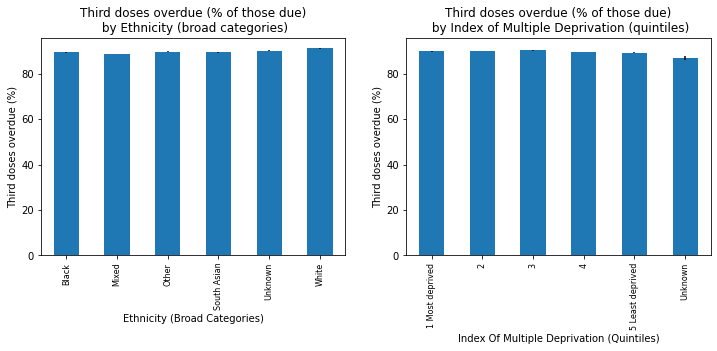

## 
 # Summary

,Third Doses due at 17 Jan 2022 (n),Third doses overdue (n),Third doses given (n),Third doses given (% of due),Total population
80+,"2,415","2,163",252,10.4,"4,109"
70-79,"4,242","3,773",469,11.1,"7,049"
care home,"1,645","1,491",154,9.4,"2,779"
shielding (aged 16-69),490,441,49,10.0,868
65-69,"2,555","2,310",245,9.6,"4,270"
LD (aged 16-64),945,840,105,11.1,"1,631"
60-64,"3,115","2,793",322,10.3,"5,271"
55-59,"3,745","3,388",357,9.5,"6,251"
50-54,"4,046","3,633",413,10.2,"6,755"
40-49,"7,525","6,748",777,10.3,"12,453"


In [4]:
tablelist = find_and_sort_filenames("tables", by_demographics_or_population="population", 
                                    pre_string="among ", tail_string=" population.csv",
                                    population_subset=f"Cumulative second dose {latest_date_3rdDUE_delay_abbreviated} ago",
                                    files_to_exclude=[
                                        f"Cumulative second dose {latest_date_3rdDUE_delay_abbreviated} ago vaccination figures among 16-17 population.csv"],
                                    )
    
# get 3rd dose figures for each group
tablelist_2nd = find_and_sort_filenames("tables", by_demographics_or_population="population", 
                                        pre_string="among ", tail_string=" population.csv",
                                        population_subset="Cumulative third dose vaccination",
                                        files_to_exclude=["Cumulative third dose vaccination figures among 16-17 population.csv"],
                                        )


second_third_doses(tablelist, tablelist_2nd, cohorts=["80+", "70-79", "care home", "shielding (aged 16-69)", "65-69", "60-64", "55-59", "50-54", "LD (aged 16-64)", "40-49", "30-39","18-29"], dose_type="Third", time_period=latest_date_3rdDUE_delay,
                   max_ylim=100,
                   latest_date_fmt=latest_date_fmt,
                   latest_date_fmt_2=latest_date_3rdDUE_fmt, 
                   backend=backend, suffix = "_tpp")